# 実験 1 量子回路

前提知識
- [Qiskitの基礎](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)
- [Ch.1.2 計算の原子](https://qiskit.org/textbook/ch-states/atoms-computation.html)

そのほかの関連教材
- [IBM Quantum Systemへのアクセス](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [IBM Quantum Systemの構成](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [トランスパイル](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantumアカウント](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [量子回路](https://qiskit.org/documentation/apidoc/circuit.html)  

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

パート 1: 量子回路による古典ロジックゲート

<!-- ::: q-block.exercise -->

### 目標

XORゲート、ANDゲート、NANDゲート、ORゲートの機能を持つ量子回路をNOTゲート（Qiskitではxと表す）、CNOTゲート（Qiskitではcx）、Toffoliゲート（Qiskitではccx）で作ります。

<!-- ::: -->

`NOT`ゲートの実装を例として示します。

In [2]:
def NOT(inp):
    """ NOT ゲート
    
    パラメーター:
        inp (str): Input, encoded in qubit 0.
        
    戻り値:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # 単一量子ビットと単一古典ビットによる量子回路
    qc.reset(0)
    
    # '0'を量子状態|0⟩、'1'を量子状態|1⟩としてエンコードする
    # 量子ビットは初期状態|0⟩なので、'0'の入力に関しては何もしなくて良い
    # 入力'1'に関しては、xを適用して|0⟩から|1⟩へ回転させる
    if inp=='1':
        qc.x(0)
        
    # 入力状態とゲート操作の間にバリアをセットします
    qc.barrier()
    
    # すでに入力をエンコードしているので、xを使ってNOTを実行できます
    qc.x(0)
    
    # ゲート操作と測定の間にバリアをセットします
    qc.barrier()
    
    # 最後に、量子ビットの|0⟩/|1⟩の出力を抽出し、ビットc[0]にエンコードします
    qc.measure(0,0)
    qc.draw('mpl')
    
    # シミュレーター上でプログラムを実行します
    backend = Aer.get_backend('qasm_simulator')
    # 出力は決定論的なので、1回のショットで取得できます
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [3]:
## 関数をテストします
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('入力',inp,'に対するNOTの出力は',out)
    display(qc.draw())
    print('\n')

入力 0 に対するNOTの出力は 1


░ ┌───┐ ░ ┌─┐
q_0: ─|0>──░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



入力 1 に対するNOTの出力は 0


┌───┐ ░ ┌───┐ ░ ┌─┐
q_0: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

### &#128211; XOR ゲート

2つのバイナリー文字列を入力として受け取り、出力を１つします。

入力が等しいとき、出力は'0'となり、入力が等しくない場合は、'1'になります。

In [2]:
def XOR(inp1,inp2):
    """XORゲート
    
    パラメーター:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    戻り値:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # 入力状態とゲート操作の間にバリアをセットします
    qc.barrier()
    
    # ここにプログラミングして量子回路でXORゲートを作ってください
    
    
    
    
    
    
    
    
    # 入力状態とゲート操作の間にバリアをセットします
    qc.barrier()
    
    qc.measure(1,0) # 量子ビット1の出力を測定
  
    # シミュレーター上でプログラムを実行します
    backend = Aer.get_backend('qasm_simulator')
    # 出力は決定論的なので、1回のショットで取得できます
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [1]:
## 関数をテストします
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('入力',inp1,inp2,'に対するXORの出力は',output)
        display(qc.draw())
        print('\n')

### &#128211; ANDゲート

2つのバイナリー文字列を入力として受け取り、出力を１つします。

入力が両方とも`'1'`だったときのみ出力が`'1'`になります。

In [6]:
def AND(inp1,inp2):
    """ANDゲート
    
    パラメーター:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    戻り値:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # ここにプログラミングして量子回路でANDゲートを作ってください

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # 量子ビット2からの出力を測定します
  
    # シミュレーター上でプログラムを実行します
    backend = Aer.get_backend('qasm_simulator')
    # 出力は決定論的なので、1回のショットで取得できます
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [2]:
## 関数をテストします
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('入力',inp1,inp2,'に対するANDの出力は',output)
        display(qc.draw())
        print('\n')

### &#128211; NANDゲート

2つのバイナリー文字列を入力として受け取り、出力を１つします。

両方の入力が`'1'`の場合のみ、出力は`'0'` になります。

In [8]:
def NAND(inp1,inp2):
    """NANDゲート
    
    パラメーター:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    戻り値:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # ここにプログラミングして量子回路でNANDゲートを作ってください


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # 量子ビット2からの出力を測定します
  
    # シミュレーター上でプログラムを実行します
    backend = Aer.get_backend('qasm_simulator')
    # 出力は決定論的なので、1回のショットで取得できます
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [3]:
## 関数をテストします
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('入力',inp1,inp2,'に対するNANDの出力は',output)
        display(qc.draw())
        print('\n')

### &#128211; ORゲート

2つのバイナリー文字列を入力として受け取り、出力を1つします。

入力のうちどちらかが`'1'`のとき、`'1'` が出力されます。

In [10]:
def OR(inp1,inp2):
    """ORゲート
    
    パラメーター:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    戻り値:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # ここにプログラミングして量子回路でORゲートを作ってください


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # 量子ビット2からの出力を測定します
  
    # シミュレーター上でプログラムを実行します
    backend = Aer.get_backend('qasm_simulator')
    # 出力は決定論的なので、1回のショットで取得できます
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [4]:
## 関数をテストします
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('入力',inp1,inp2,'に対するORの出力は',output)
        display(qc.draw())
        print('\n')

## パート2: 量子コンピューター上のANDゲート

<!-- ::: q-block.exercise -->

### 目標

ANDゲートを2つの量子システム上で実行し、異なる回路特性が結果に与える影響を学びます。

<!-- ::: -->

パート１では、量子ゲートで`AND`ゲートを作り、シミュレーター上で実行しました。パート２では、再び`AND`ゲートを作りますが、実際の量子コンピューターで実行します。実際の量子システムを使う際には、今日の量子コンピューターがフォールトトレラントではなく、ノイズがあるということを認識しておかなければいけません。

量子システムにおける「ノイズ」は、起きてはならないが起こってしまうもの、すべての影響の集合です。ノイズが発生すると、出力が必ずしも期待どおりの結果になるとは限りません。量子回路のすべてのプロセス（初期状態の準備、ゲートの適用、出力の測定）に関連してノイズが発生します。ゲートのノイズは、ゲートの種類や量子ビットの違いによって異なります。`cx`ゲートは通常、単一の量子ビットゲートよりもノイズが多くなります。

ここでは、IBM Quantum Experienceから量子システムを使います。アクセス権がない方は、[こちら](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)からアクセス権を得ることができます。

実際の量子コンピューターを使う準備ができたので、始めましょう。

### ステップ1. デバイスの選択

以下のセルを実行してディスクに保存されている資格情報からアカウントをロードします：

In [17]:
IBMQ.load_account()

あなたのアカウントが読み込まれた後、以下のセルを実行することであなたがアクセス可能なプロバイダーのリストを見ることができます。各プロバイダーでは、利用できるシステムが異なります。オープン・ユーザーの場合は、一般的には`ibm-q/open/main`という名のプロバイダーが1つ表示されます：

In [16]:
IBMQ.providers()

`get_provider`を使ってプロバイダーを取得してみましょう。`provider.backends( )`というコマンドは、選択したプロバイダーから利用可能なバックエンドのリストを表示します。

In [15]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

これらのオプションの中から、回路を実行するシステムを1つ選択します。`ibmq_qasm_simulator`以外は、全て、あなたが使用することのできる実際の量子コンピューターです。システム間の違いは、量子ビット数、接続性、エラー率です。

次のセルを実行すると、選択したバックエンドに関する全ての情報を表示するウィジェットが表示されます。タブをクリックすると必要な情報を得ることができます。例えば、`configuration` タブでは、バックエンドの現在の状況、量子ビット数、接続性が表示され、`Error Map`タブでは、そのシステムの最新のノイズ情報が表示されます。

In [9]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_16_melbourne')
backend_ex

ANDゲートの回路のためには、3量子ビット以上のバックエンドが必要となり、`ibmq_armonk`以外の全ての実システムが該当します。以下はバックエンドをフィルタリングする例です。ここでは、量子ビット数でフィルタリングし、シミュレーターを取り除いています：

In [8]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

システムを選択する便利な方法の一つは、`least_busy`関数を使ってキュー内のジョブ数の最も少ないバックエンドを選ぶことです。この方法の欠点は実行結果の精度が比較的悪くなる可能性があることです。当然のことながら、エラー率の最も少ないシステムが最も人気があるからです。

In [17]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

実際の量子コンピューターは定期的に再較正する必要があり、特定の量子ビットやゲートの忠実度は時間と共に変化します。よって、どのシステムが、よりエラーの少ない結果を出力するかは変化します。`ibmq_athens`は比較的低いエラー率を示す傾向があります。

この演習では、2つのシステムを選択します：`ibmq_athens`を低いエラー率のものとして選択します。また、`ibmqx2`を特別な接続性、特に三角形の接続性があるために選択します。この接続性はトフォリゲートの回路において役立ちます。

In [5]:
# run this cell
backend1 = provider.get_backend('ibmqx2')
backend2 = provider.get_backend('ibmq_athens')

### ステップ2. 実デバイスのためのAND関数の定義

次にAND関数を定義します。ショット数としてオープンなIBMシステムの最大ショット数である8192を選択して、最終結果のばらつきを減らします。関連情報は[ここ](https://quantum-computing.ibm.com/docs/manage/backends/configuration)でよく説明されています。

#### Qiskitトランスパイラー

実際の量子コンピューターで回路が実行される時、通常、選択したバックエンド用に回路をトランスパイルする必要があることを知っておくことが重要です。つまり、量子コンピューターが実際に実行できるゲートのみが回路に含まれるようにします。主に、スワップゲートが追加され、回路内の2量子ビットゲートがデバイス上の量子ビットペアにマップされて、実際にそのゲートが実行できるようにします。次のセルでは、トフォリゲートで表されたANDゲートが、IBMハードウェアで実行可能な種類のみの単一量子ゲートと2量子ビットゲートに分解されます。CNOTゲートが、３量子ビットの全てで、つまり三角トポロジー間で実行可能な場合、他のゲートは必要ありません。

AND gate


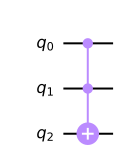



Transpiled AND gate with all the reqiured connectiviy


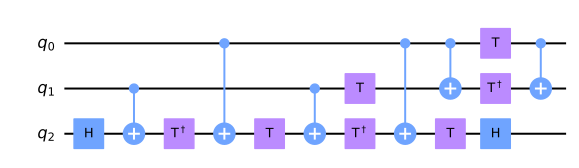

In [4]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\n全ての接続性を満たすようにトランスパイルされたANDゲート')
qc_and.decompose().draw()

さらに、全体のゲート数、つまり、入力回路のトータルの長さを削減するためにトランスパイラーが最適化を実行します。「デバイスのトポロジーに合わせてSWAPを追加すること」と「回路の長さを削減するための最適化」は、互いに相反していることに注意してください。以下では、計算に使われるデバイス上の量子ビット数を選択できる`initial_layout`と、回路SWAPマッピングと最適化メソッドを実行するために内部デフォルトで選択する引数`optimization_level`を使用します。

回路の深さについてのトランスパイル関数は[ここ](https://qiskit.org/documentation/apidoc/transpiler.html)でより詳しく学ぶことができます。

トランスパイルのステップが含まれた実際のシステム用に、パート1のAND関数を適切に変更してみましょう。

In [ ]:
from qiskit.tools.monitor import job_monitor

In [6]:
# セルを実行して、実際の量子システムのANDゲートを定義します

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = execute(qc_trans, backend, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

量子システムにジョブを投げると、`job_monitor`が、ジョブ待ちラインのどこに送信されたジョブがいるかトラッキングを始めます。

#### ケースA) 三角形の接続性を持った<code>ibmqx2</code>における３量子ビット

最初に、先ほど紹介したウィジェットを使って`ibmqx2`を調べます。三角形の接続性を持った３量子ビットのグループを見つけ、最初のレイアウトを決定します。

In [61]:
# このセルを実行してウィジェットを開始します
backend1

<p>&#128211; 以下のセルのリスト変数<code>layout1</code>に選択したレイアウトを割り当てます。</p>

In [11]:
# 選択したinitial_layoutを変数layout1にリストとして割り当てます
# 例) layout1 = [0,2,4]
layout1 = 

<p>&#128211; 初期レイアウトをどうしてそのように選択したか説明してください。</p>

 以下のセルを実行して`ibmqx2`上で`AND`ゲートを実行します。

In [13]:
output1_all = []
qc_trans1_all = []
prob1_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans1, output1 = AND(input1, input2, backend1, layout1)
        
        output1_all.append(output1)
        qc_trans1_all.append(qc_trans1)
        
        prob = output1[str(int( input1=='1' and input2=='1' ))]/8192
        prob1_all.append(prob)
        
        print('\n入力',input1,input2,'に対する正解の確率は')
        print( '{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\n確率の最高値は {:.2f}'.format(best))
print('確率の最低値は {:.2f}'.format(worst))

ジョブの実行が完了すると、以下のようにして結果に簡単にアクセス可能です：


```python
results = backend.retrieve_job('JOB_ID').result().
```


job_ids は上記で定義した`AND`関数によって出力されます。また、job_idsは、あなたの`IQX`アカウントの結果にも載っています。より詳しい情報は[ここ](https://quantum-computing.ibm.com/docs/manage/account/ibmq)で確認できます。

#### ケースB) 線形最近傍接続を持つ<code>ibmq_athens</code>における３量子ビット

以下のセルを実行して、ウィジェットを使って`ibmq_athens`を調べます。

In [64]:
backend2

<p>&#128211; 線形最近傍接続を持つ３量子ビットを探します。エラーマップを考慮して、初期レイアウトを決定し、それをリスト変数layout2に割り当てます。</p>


In [65]:
layout2 = []

<p>&#128211; 初期レイアウトをどうしてそのように選択したか説明してください。</p>

以下のセルを実行して`ibmq_athens`上で`AND`ゲートを実行します。

In [12]:
output2_all = []
qc_trans2_all = []
prob2_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans2, output2 = AND(input1, input2, backend2, layout2)
        
        output2_all.append(output2)
        qc_trans2_all.append(qc_trans2)
        
        prob = output2[str(int( input1=='1' and input2=='1' ))]/8192
        prob2_all.append(prob)
        
        print('\n入力',input1,input2,'に対する正解の確率は')
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\n確率の最高値は {:.2f}'.format(best))
print('確率の最低値は {:.2f}'.format(worst))

### ステップ3. 結果の解釈

回路を区別するための量がいくつかあります。その中で最も重要なのは**回路の深さ**です。 回路の深さは[ここ](https://qiskit.org/documentation/apidoc/circuit.html) で詳細に定義されています（Supplementary Information(補足情報)を参照し、Quantum Circuit Properties(量子回路のプロパティ)のタブをクリックしてください）。回路の深さは、回路内のゲートの数に比例し、ハードウェア上の回路の実行時間におおよそ比例します。したがって、回路の深さは、実行された回路の忠実度の推定のために簡単に使えるメトリックです。

2番目に重要な値は、回路内の**非ローカル（複数量子ビット）ゲート**の数です。IBM Quantumシステムで、物理的に実行できる非ローカル・ゲートはCNOTゲートのみです。CNOTゲートは実行するのに最も価値の高いゲートであるため、このゲートの総数は、最終的な出力の精度のベンチマークとしてもよく機能することを覚えておいてください。

#### A) 回路の深さと結果の精度

以下のセルを実行すると、`ibmq_athens`で実行された４つのトランスパイルされたANDゲートの回路図が、入力、正解の確率、回路の深さと共に表示されます。

In [14]:
print('入力 0 0 の場合のibmq_athensでのトランスパイルされたANDゲート回路')
print('\n回路の深さ : {}'.format (qc_trans2_all[0].depth()))
print('非ローカル・ゲートの数 : {}'.format (qc_trans2_all[0].num_nonlocal_gates()))
print('正解の確率 : {:.2f}'.format(prob2_all[0]) )
qc_trans2_all[0].draw()

In [15]:
print('入力 0 1 の場合のibmq_athensでのトランスパイルされたANDゲート回路')
print('\n回路の深さ : {}'.format (qc_trans2_all[1].depth()))
print('非ローカル・ゲートの数 : {}'.format (qc_trans2_all[1].num_nonlocal_gates()))
print('正解の確率 : {:.2f}'.format(prob2_all[1]) )
qc_trans2_all[1].draw()

In [16]:
print('入力 1 0 の場合のibmq_athensでのトランスパイルされたANDゲート回路')
print('\n回路の深さ : {}'.format (qc_trans2_all[2].depth()))
print('非ローカル・ゲートの数 : {}'.format (qc_trans2_all[2].num_nonlocal_gates()))
print('正解の確率 : {:.2f}'.format(prob2_all[2]) )
qc_trans2_all[2].draw()

In [17]:
print('入力 1 1 の場合のibmq_athensでのトランスパイルされたANDゲート回路')
print('\n回路の深さ : {}'.format (qc_trans2_all[3].depth()))
print('非ローカル・ゲートの数 : {}'.format (qc_trans2_all[3].num_nonlocal_gates()))
print('正解の確率 : {:.2f}'.format(prob2_all[3]) )
qc_trans2_all[3].draw()

<p>&#128211; 回路が似ていない理由を説明してください。回路の特性と結果の精度との関係を説明してください。</p>


#### B) 量子ビットの接続性と回路の深さ

以下のセルを実行して、`ibmqx2`のトランスパイルされた回路を調べます。

In [18]:
print('入力 0 0 の場合のibmqx2でのトランスパイルされたANDゲート回路')
print('\nT回路の深さ : {}'.format (qc_trans1_all[0].depth()))
print('非ローカル・ゲートの数 : {}'.format (qc_trans1_all[0].num_nonlocal_gates()))
print('正解の確率 : {:.2f}'.format(prob1_all[0]) )
qc_trans1_all[0].draw()

In [19]:
print('入力 0 1 の場合のibmqx2でのトランスパイルされたANDゲート回路')
print('\n回路の深さ : {}'.format (qc_trans1_all[1].depth()))
print('非ローカル・ゲートの数 : {}'.format (qc_trans1_all[1].num_nonlocal_gates()))
print('正解の確率 : {:.2f}'.format(prob1_all[1]) )
qc_trans1_all[1].draw()

In [20]:
print('入力 1 0 の場合のibmqx2でのトランスパイルされたANDゲート回路 1 0')
print('\n回路の深さ : {}'.format (qc_trans1_all[2].depth()))
print('非ローカル・ゲートの数 : {}'.format (qc_trans1_all[2].num_nonlocal_gates()))
print('正解の確率 : {:.2f}'.format(prob1_all[2]) )
qc_trans1_all[2].draw()

In [21]:
print('入力 1 1 の場合のibmqx2でのトランスパイルされたANDゲート回路 1 1')
print('\n回路の深さ : {}'.format (qc_trans1_all[3].depth()))
print('非ローカル・ゲートの数 : {}'.format (qc_trans1_all[3].num_nonlocal_gates()))
print('正解の確率 : {:.2f}'.format(prob1_all[3]) )
qc_trans1_all[3].draw()

<p>&#128211; 回路が似ている理由を説明してください。回路の特性と結果の精度との関係を説明してください。</p>



#### C) エラー率と結果の精度

<p>&#128211; これまで、実際のデバイスでの回路性能の指標として、回路の深さと非ローカル・ゲート数を使ってきました。しかし、上記の結果には興味深いものがあります。<code>ibmq_athens</code>のANDゲートは、回路ごとに~8-15の<code>cx</code>ゲートがありますが、6個の<code>cx</code>ゲートのみの<code>ibmqx2</code>と同等またはそれ以上の成功率です。これはどうしてでしょうか？ </p>
